In [8]:
#roi raw activation from selectivity_summary file
import pandas as pd
import numpy as np
from plotnine import (ggplot, aes, geom_point, geom_linerange, theme_classic, labs,
                      scale_color_manual, scale_shape_manual, theme, element_text, element_line, element_blank,
                      coord_cartesian, scale_x_discrete, guides, guide_legend)

# Read the CSV data with updated path
data = pd.read_csv("results/tools/selectivity/selectivity_summarytoolloc.csv")

# Filter data for spaceloc subjects and relevant ROIs
filtered_data = data[(data['sub'].str.contains('spaceloc')) & 
                     (data['roi'].isin(['LO', 'pIPS'])) & 
                     (data['hemi'].isin(['left', 'right']))]

# Calculate mean activation and standard deviation for each combination
summary_df = filtered_data.groupby(['hemi', 'roi', 'cond'])['mean_act'].agg(['mean', 'std', 'count']).reset_index()
summary_df['sem'] = summary_df['std'] / np.sqrt(summary_df['count'])

# Rename columns for clarity
summary_df.columns = ['Hemisphere', 'ROI', 'Condition', 'Mean', 'Std', 'Count', 'SE']

# Create more readable labels
summary_df['ROI'] = summary_df['ROI'].map({'LO': 'LO', 'pIPS': 'pIPS'})
summary_df['Hemisphere'] = summary_df['Hemisphere'].map({'left': 'Left', 'right': 'Right'})
summary_df['Region'] = summary_df['Hemisphere'] + ' ' + summary_df['ROI']

# Create a custom order for the x-axis
summary_df['Region_order'] = pd.Categorical(summary_df['Region'], 
                                            categories=['Left pIPS', 'Left LO', 'Right pIPS', 'Right LO'],
                                            ordered=True)

# Print summary statistics
print(summary_df)

# Function to create plot for a specific condition
def create_plot(data, condition):
    plot = (ggplot(data[data['Condition'] == condition],
                   aes(x='Region_order', y='Mean', color='Hemisphere'))
            + geom_linerange(aes(ymin='Mean-Std', ymax='Mean+Std'), size=1)
            + geom_point(size=4, fill='white', stroke=1.5)
            + theme_classic()
            + labs(title=f'{condition}',
                   x='Region', y='Mean Activation')
            + scale_color_manual(values={'Left': '#31688E', 'Right': '#E69F00'})
            + scale_shape_manual(values={'LO': 'o', 'pIPS': 'o'})
            + theme(text=element_text(size=12),
                    axis_text_x=element_text(angle=45, hjust=1),
                    axis_line=element_line(colour="black"),
                    panel_border=element_blank(),
                    legend_position="right",
                    legend_box_margin=0,
                    figure_size=(10, 6))
            + coord_cartesian(ylim=(0, data['Mean'].max() * 1.2))
            + scale_x_discrete(limits=['Left pIPS', 'Left LO', 'Right pIPS', 'Right LO'])
            + guides(color=guide_legend(title="Hemisphere"),
                     shape=guide_legend(title="ROI")))
    return plot

# Create and print plots for tool conditions
#tool_plot = create_plot(summary_df, 'tool')
#nontool_plot = create_plot(summary_df, 'nontool')

#print(tool_plot)
#print(nontool_plot)

# Save the plots with updated paths
#tool_plot.save("results/tools/selectivity/activation_plot_tool.png", dpi=300, width=8, height=6)
#nontool_plot.save("results/tools/selectivity/activation_plot_nontool.png", dpi=300, width=8, height=6)

  Hemisphere   ROI Condition      Mean       Std  Count        SE      Region  \
0       Left    LO   nontool  5.214392  0.813844     18  0.191825     Left LO   
1       Left    LO      tool  5.465482  0.807625     18  0.190359     Left LO   
2       Left  pIPS   nontool  3.697782  0.367059     18  0.086517   Left pIPS   
3       Left  pIPS      tool  3.988558  0.464462     18  0.109475   Left pIPS   
4      Right    LO   nontool  4.868349  0.694296     18  0.163647    Right LO   
5      Right    LO      tool  4.849661  0.811796     18  0.191342    Right LO   
6      Right  pIPS   nontool  3.561510  0.412431     18  0.097211  Right pIPS   
7      Right  pIPS      tool  3.680670  0.468393     18  0.110401  Right pIPS   

  Region_order  
0      Left LO  
1      Left LO  
2    Left pIPS  
3    Left pIPS  
4     Right LO  
5     Right LO  
6   Right pIPS  
7   Right pIPS  


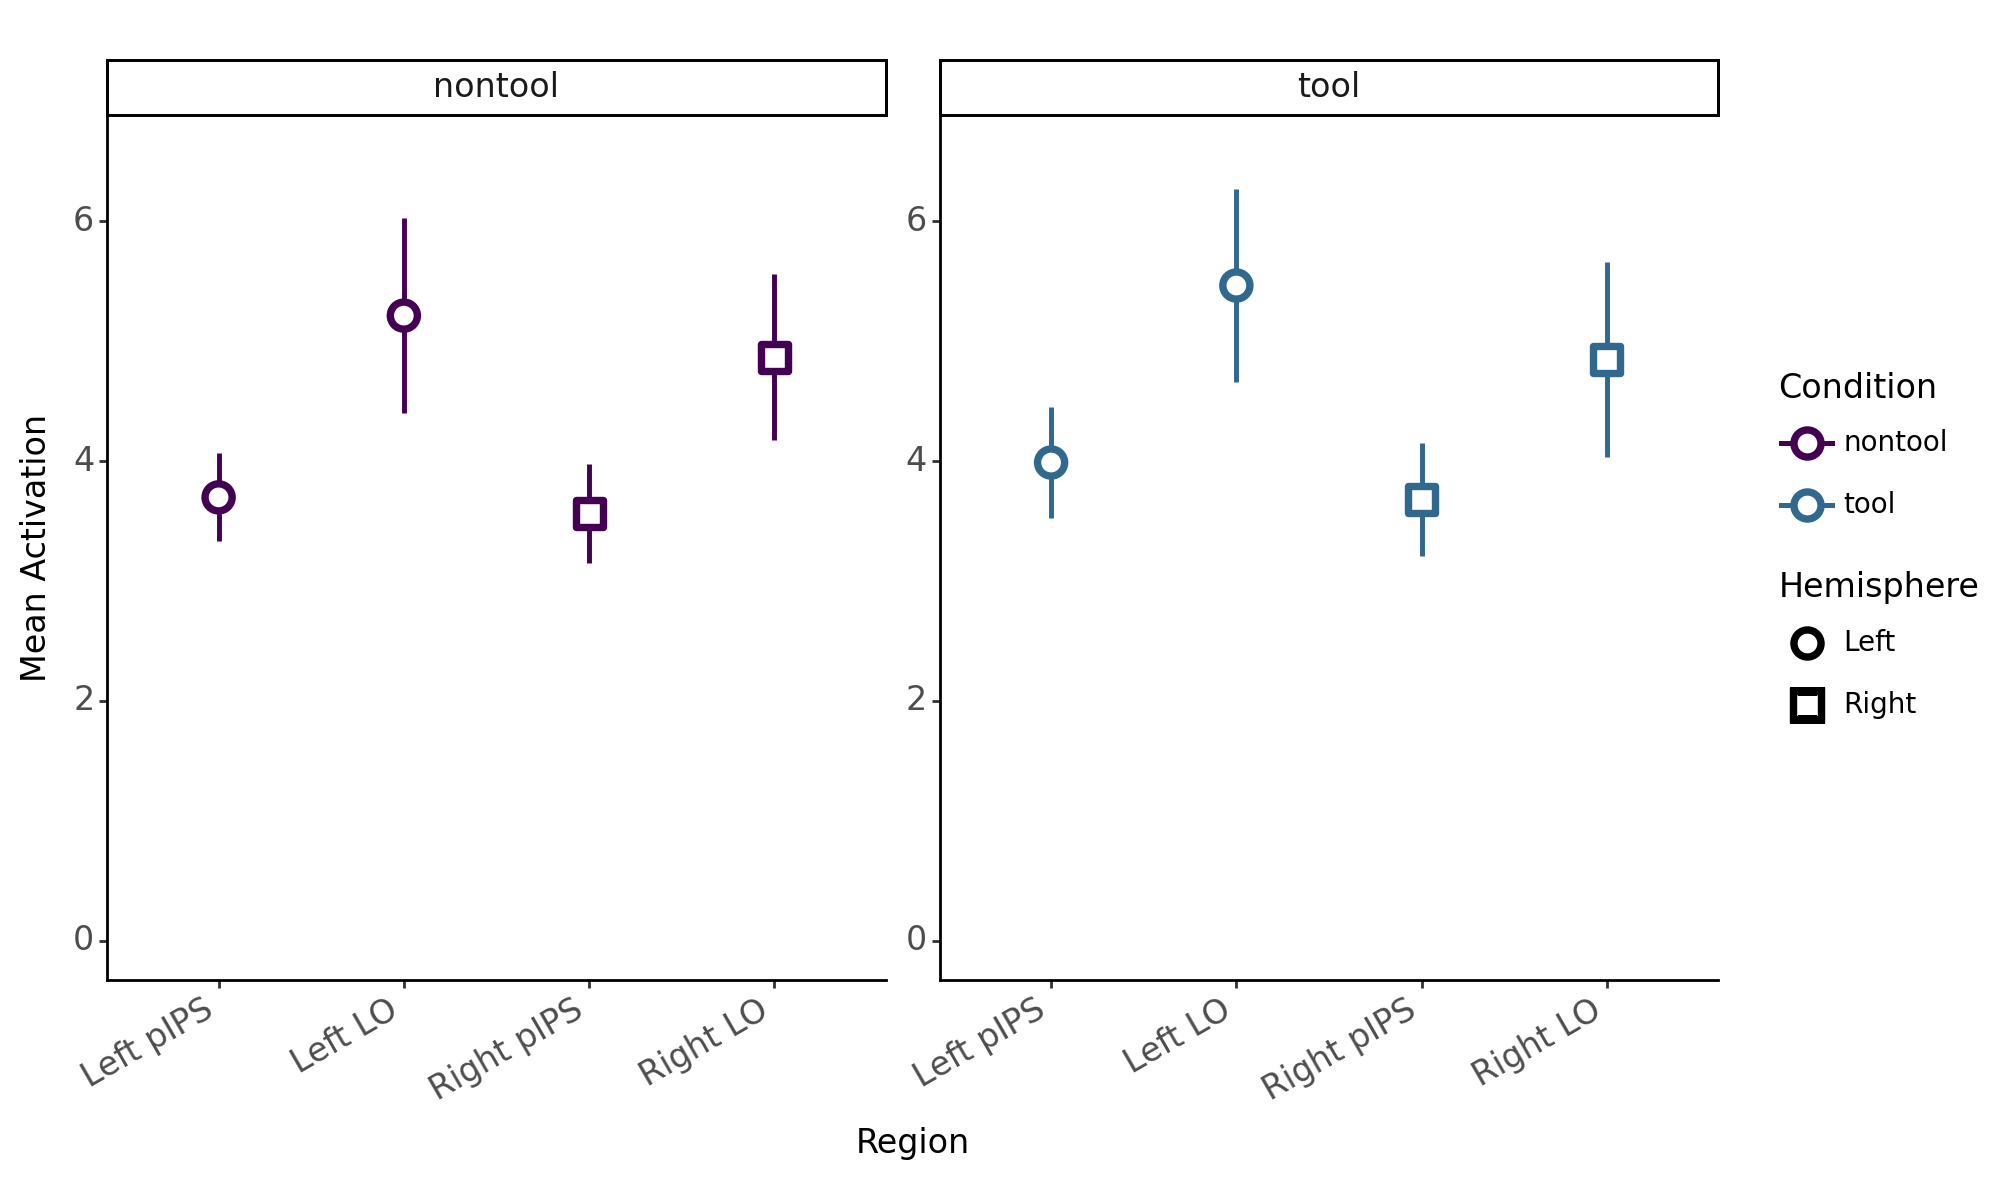

In [9]:
import pandas as pd
import numpy as np
from plotnine import (ggplot, aes, geom_point, geom_linerange, theme_classic, labs,
                      scale_color_manual, scale_shape_manual, theme, element_text, 
                      element_line, element_blank, coord_cartesian, scale_x_discrete, 
                      facet_wrap, guides, guide_legend)

# Read the CSV data with updated path
data = pd.read_csv("results/tools/selectivity/selectivity_summarytoolloc.csv")

# Filter data for spaceloc subjects and relevant ROIs
filtered_data = data[(data['sub'].str.contains('spaceloc')) &
                     (data['roi'].isin(['LO', 'pIPS'])) &
                     (data['hemi'].isin(['left', 'right']))]

# Calculate mean activation and standard deviation for each combination
summary_df = filtered_data.groupby(['hemi', 'roi', 'cond'])['mean_act'].agg(['mean', 'std', 'count']).reset_index()
summary_df['sem'] = summary_df['std'] / np.sqrt(summary_df['count'])

# Rename columns for clarity
summary_df.columns = ['Hemisphere', 'ROI', 'Condition', 'Mean', 'Std', 'Count', 'SE']

# Create more readable labels
summary_df['ROI'] = summary_df['ROI'].map({'LO': 'LO', 'pIPS': 'pIPS'})
summary_df['Hemisphere'] = summary_df['Hemisphere'].map({'left': 'Left', 'right': 'Right'})
summary_df['Region'] = summary_df['Hemisphere'] + ' ' + summary_df['ROI']

# Create a custom order for the x-axis
summary_df['Region_order'] = pd.Categorical(summary_df['Region'],
                                            categories=['Left pIPS', 'Left LO', 'Right pIPS', 'Right LO'],
                                            ordered=True)

# Function to create plot
def create_plot(data):
    plot = (ggplot(data, aes(x='Region_order', y='Mean', color='Condition', shape='Hemisphere'))
            + geom_linerange(aes(ymin='Mean-Std', ymax='Mean+Std'), size=1)
            + geom_point(size=4, fill='white', stroke=1.5)
            + theme_classic()
            + labs(x='Region', y='Mean Activation')
            + scale_color_manual(values={'tool': '#31688E', 'nontool': '#440154'})  # Updated for tool conditions
            + scale_shape_manual(values={'Left': 'o', 'Right': 's'})  # Changed Right to square for better distinction
            + theme(text=element_text(size=12),
                    axis_text_x=element_text(angle=30, hjust=1),
                    axis_line=element_line(colour="black"),
                    panel_border=element_blank(),
                    legend_position="right",
                    legend_box="vertical",
                    legend_title=element_text(size=12),
                    legend_text=element_text(size=10),
                    figure_size=(10, 6))
            + coord_cartesian(ylim=(0, data['Mean'].max() * 1.2))
            + scale_x_discrete(limits=['Left pIPS', 'Left LO', 'Right pIPS', 'Right LO'])
            + guides(color=guide_legend(title="Condition"),
                     shape=guide_legend(title="Hemisphere"))
            + facet_wrap('~ Condition', scales='free_y'))
    return plot

# Create and print plot
plot = create_plot(summary_df)
print(plot)

# Save the plot with updated path
#plot.save("results/tools/selectivity/activation_plot_combined.png", dpi=300, width=10, height=6)
# rois defined by registered native parcellation

In [10]:
# Add this analysis after creating summary_df in the previous code
print("Tool vs Non-tool Comparison by Region:")
for region in summary_df['Region'].unique():
    tool_mean = summary_df[(summary_df['Region'] == region) & (summary_df['Condition'] == 'tool')]['Mean'].values[0]
    nontool_mean = summary_df[(summary_df['Region'] == region) & (summary_df['Condition'] == 'nontool')]['Mean'].values[0]
    difference = tool_mean - nontool_mean
    percent_diff = (difference / nontool_mean) * 100
    
    print(f"\n{region}:")
    print(f"Tool mean: {tool_mean:.2f}")
    print(f"Non-tool mean: {nontool_mean:.2f}")
    print(f"Difference: {difference:.2f}")
    print(f"Percent difference: {percent_diff:.1f}%")

Tool vs Non-tool Comparison by Region:

Left LO:
Tool mean: 5.47
Non-tool mean: 5.21
Difference: 0.25
Percent difference: 4.8%

Left pIPS:
Tool mean: 3.99
Non-tool mean: 3.70
Difference: 0.29
Percent difference: 7.9%

Right LO:
Tool mean: 4.85
Non-tool mean: 4.87
Difference: -0.02
Percent difference: -0.4%

Right pIPS:
Tool mean: 3.68
Non-tool mean: 3.56
Difference: 0.12
Percent difference: 3.3%


In [11]:
# Let's check if we're using the correct cope numbers
print("Unique conditions in data:")
print(filtered_data['cond'].unique())

# Check if we're getting data from the right contrasts
print("\nLet's look at the full contrast structure:")
print(filtered_data.groupby('cond')['mean_act'].count())

# Check if we're averaging what we think we are
print("\nSample of raw data points:")
print(filtered_data[['sub', 'roi', 'hemi', 'cond', 'mean_act']].head(10))

Unique conditions in data:
['tool' 'nontool']

Let's look at the full contrast structure:
cond
nontool    72
tool       72
Name: mean_act, dtype: int64

Sample of raw data points:
                 sub   roi   hemi     cond  mean_act
0   sub-spaceloc1001    LO   left     tool  6.136708
1   sub-spaceloc1001    LO   left  nontool  5.740684
4   sub-spaceloc1001  pIPS   left     tool  4.589363
5   sub-spaceloc1001  pIPS   left  nontool  3.966929
8   sub-spaceloc1001    LO  right     tool  5.148570
9   sub-spaceloc1001    LO  right  nontool  4.978732
12  sub-spaceloc1001  pIPS  right     tool  4.362646
13  sub-spaceloc1001  pIPS  right  nontool  3.776692
16  sub-spaceloc1002    LO   left     tool  6.700597
17  sub-spaceloc1002    LO   left  nontool  6.603218


In [12]:
# Let's check how many voxels we're getting per ROI
print("\nROI sizes:")
print(filtered_data.groupby(['roi', 'hemi'])['roi_size'].mean())


ROI sizes:
roi   hemi 
LO    left     16648.222222
      right    16801.666667
pIPS  left     30253.777778
      right    27094.055556
Name: roi_size, dtype: float64
